In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def imshow_with_grid(img):
    '''Plota imagem junto com uma grade para facilitar a visualização dos pixels'''
    plt.figure(figsize=(10,10))
    plt.imshow(img, 'gray')
    plt.xticks(np.arange(-0.5, img.shape[1]+0.5))
    plt.yticks(np.arange(-0.5, img.shape[0]+0.5))
    plt.grid()
    plt.show()

In [3]:
img = plt.imread('componentes.tiff')
img2 = plt.imread('blob.tiff')
img3 = plt.imread('shape.tiff')
# A imagem está no intervalo [0, 255], o comando abaixo é utilizado
# para transformar a imagem para o tipo bool [False, True]
img = img>0
img2 = img2>0
img3 = img3>0

## Imagens originais

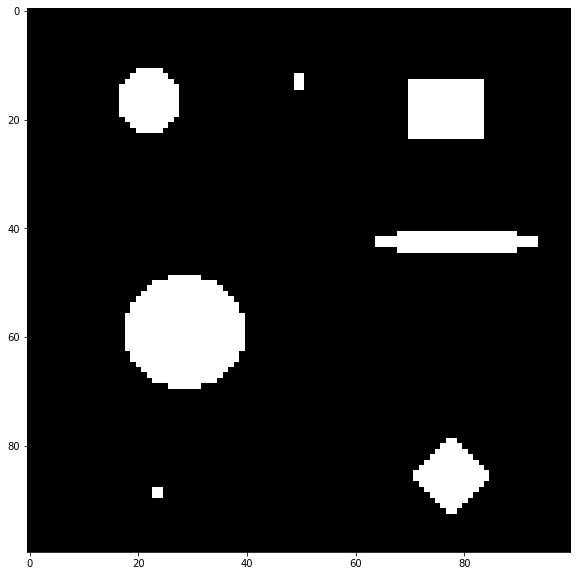

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(img, 'gray')
plt.show()

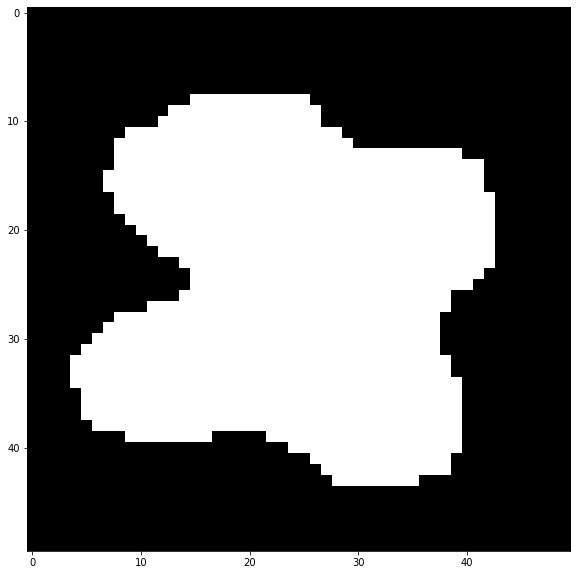

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(img2, 'gray')
plt.show()

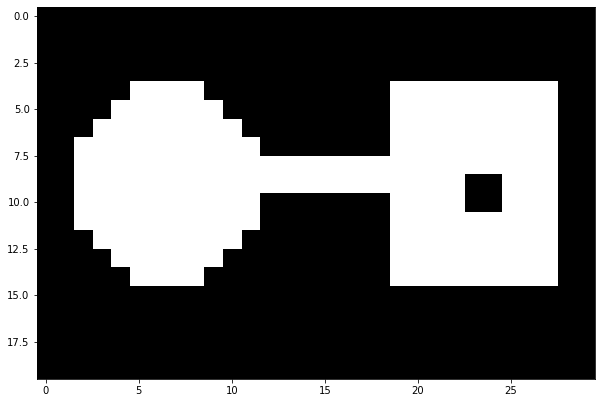

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(img3, 'gray')
plt.show()

## Dilatação

In [7]:
def dilation(img, elem_est, origin):
    '''Dilatação de uma imagem binária img utilizando o elemento
       estruturante elem_est. A origem do elemento estruturante
       é indicada pelo ponto origin'''

    num_rows, num_cols = img.shape
    num_rows_ee, num_cols_ee = elem_est.shape
    
    # Armazena as coordenadas do elemento estruturante. As coordenadas
    # são refletidas, de acordo com a definição de dilatação
    set_ee = []
    for row in range(num_rows_ee):
        for col in range(num_cols_ee):
            if elem_est[row, col]==1:
                set_ee.append((origin[0]-row, origin[1]-col))
    
    img_res = np.zeros_like(img)
    for row in range(num_rows):
        for col in range(num_cols):
            z = (row, col)
            has_intersect = intersects(img, set_ee, z)
            if has_intersect:
                img_res[row, col] = 1
                
    return img_res 

def intersects(img, set_ee, z):
    '''Verifica se algum ponto do conjunto set_ee, transladado 
       de uma quantia z, mapeia para um pixel branco na imagem img'''

    for point in set_ee:
        # Translada o ponto
        trans_point = (point[0]+z[0], point[1]+z[1])
        # Verifica ponto somente se ele estiver dentro da imagem
        if trans_point[0]>=0 and trans_point[0]<img.shape[0] and \
           trans_point[1]>=0 and trans_point[1]<img.shape[1]:
        
            if img[trans_point]==1:
                return True
    return False

In [8]:
elem_est = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])

img_res = dilation(img, elem_est, origin=(1, 1))
img2_res = dilation(img2, elem_est, origin=(1, 1))
img3_res = dilation(img3, elem_est, origin=(1, 1))

## Imagem de borda externa

In [9]:
img_borda_ext = img_res ^ img
img2_borda_ext = img2_res ^ img2
img3_borda_ext = img3_res ^ img3

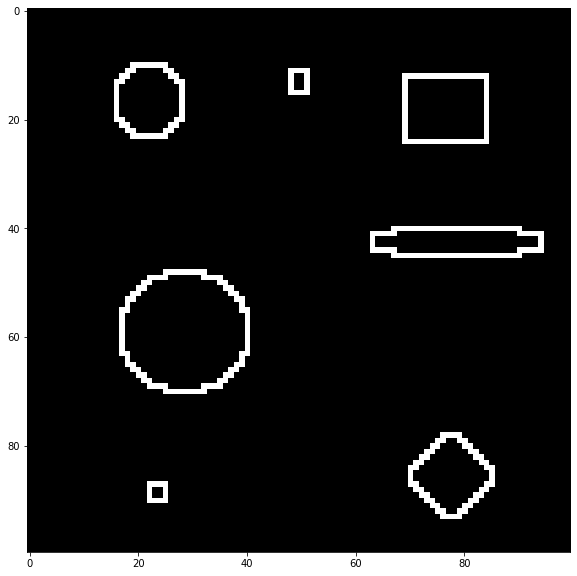

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(img_borda_ext, 'gray')
plt.show()

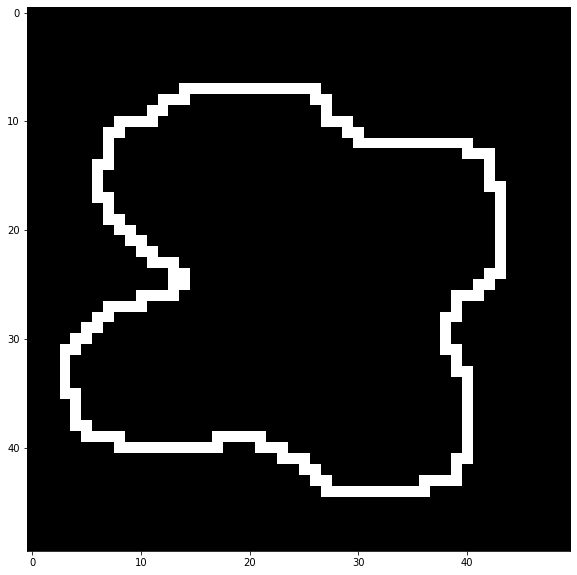

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(img2_borda_ext, 'gray')
plt.show()

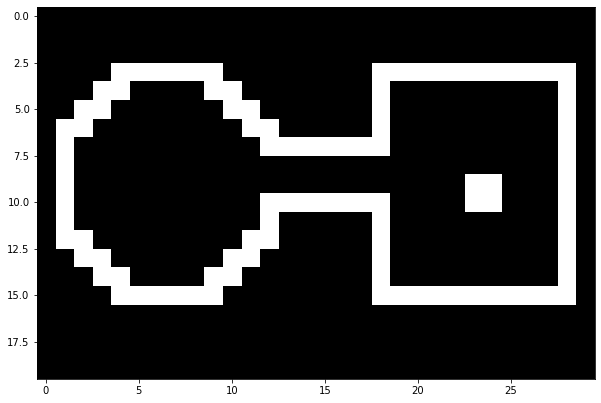

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(img3_borda_ext, 'gray')
plt.show()

## Função geral para cálculo das distâncias

In [13]:
def calc_dist(x, y, img_borda, dist_type):
    n_rows, n_cols = img_borda.shape
    dists = []
    for row in range(n_rows):
        for col in range(n_cols):
            if img_borda[row][col]:
                if dist_type == 'euclidiana':
                    dists.append(( (x-row)**2 + (y-col)**2 )**0.5)
                elif dist_type == 'city':
                    dists.append(( abs(x-row) + abs(y-col)))

    return dists
            
def distancia(img, img_borda_ext, dist_type):
    n_rows, n_cols = img.shape
    img_dist = [[0.0 for j in range(len(img[0]))] for i in range(len(img))]

    for row in range(n_rows):
        for col in range(n_cols):
            img_dist[row][col] = min(calc_dist(row, col, img_borda_ext, dist_type))

    return img_dist

## Calculando as transformadas

In [14]:
img_euclidiana = distancia(img, img_borda_ext, 'euclidiana')
img2_euclidiana = distancia(img2, img2_borda_ext, 'euclidiana')
img3_euclidiana = distancia(img3, img3_borda_ext, 'euclidiana')
img_city = distancia(img, img_borda_ext, 'city')
img2_city = distancia(img2, img2_borda_ext, 'city')
img3_city = distancia(img3, img3_borda_ext, 'city')

## Imagens Finais

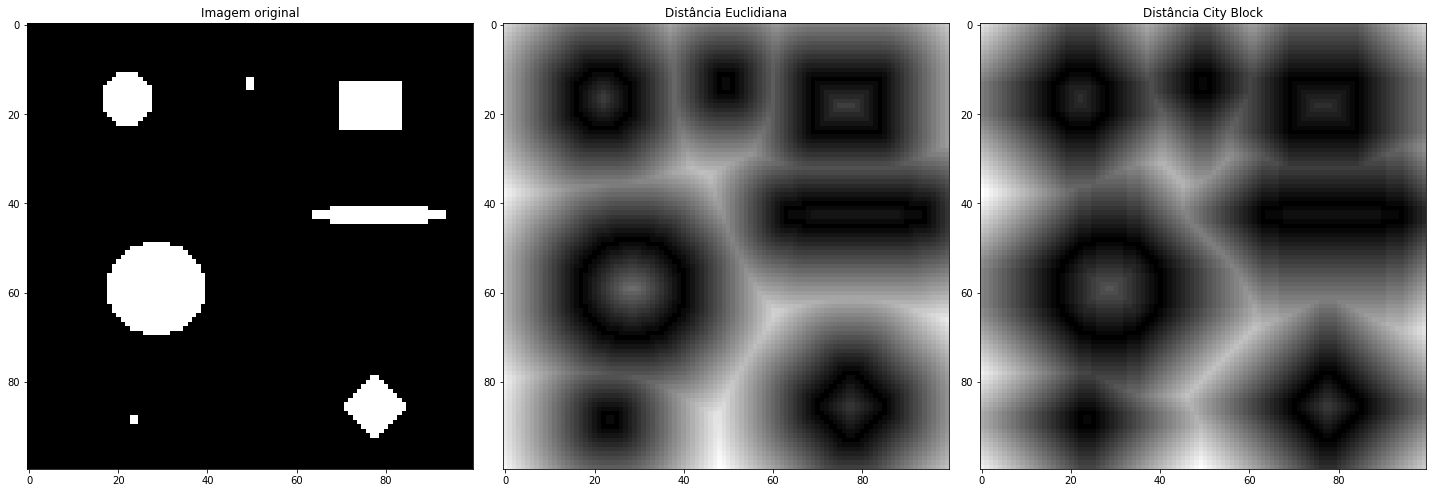

In [15]:
fig, ax = plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(img, 'gray')
ax[0].set_title('Imagem original')
ax[1].imshow(img_euclidiana, 'gray')
ax[1].set_title('Distância Euclidiana')
ax[2].imshow(img_city, 'gray')
ax[2].set_title('Distância City Block')
fig.tight_layout()
plt.show()

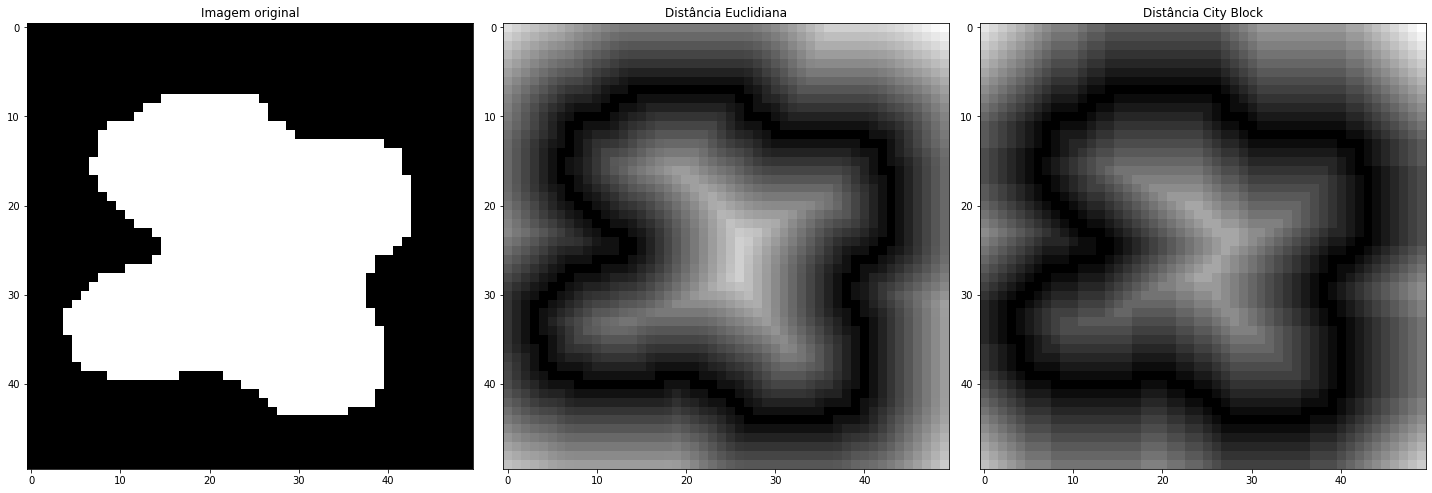

In [16]:
fig, ax = plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(img2, 'gray')
ax[0].set_title('Imagem original')
ax[1].imshow(img2_euclidiana, 'gray')
ax[1].set_title('Distância Euclidiana')
ax[2].imshow(img2_city, 'gray')
ax[2].set_title('Distância City Block')
fig.tight_layout()
plt.show()

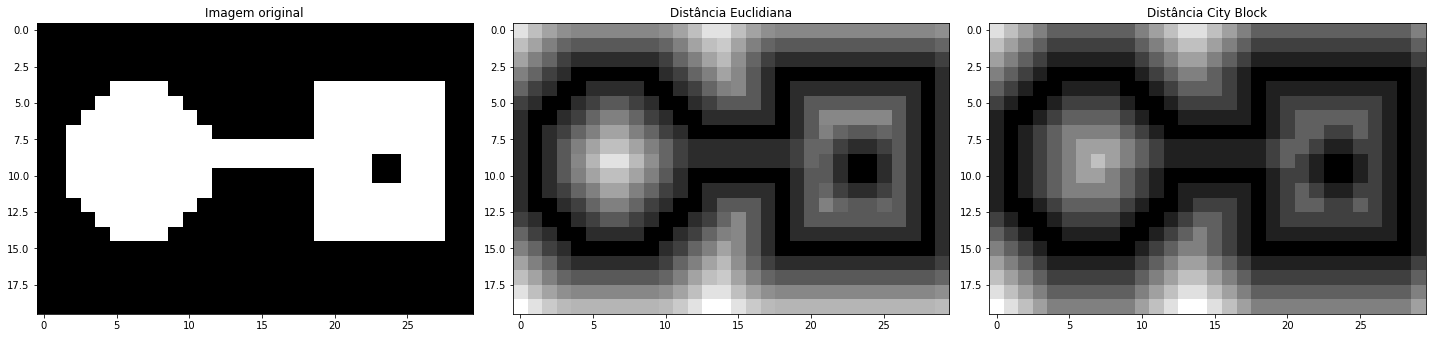

In [17]:
fig, ax = plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(img3, 'gray')
ax[0].set_title('Imagem original')
ax[1].imshow(img3_euclidiana, 'gray')
ax[1].set_title('Distância Euclidiana')
ax[2].imshow(img3_city, 'gray')
ax[2].set_title('Distância City Block')
fig.tight_layout()
plt.show()